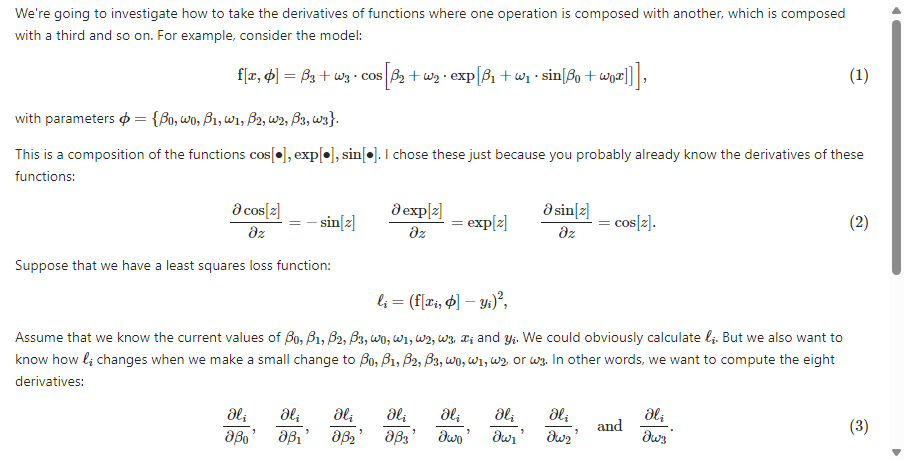

In [1]:
import numpy as np

In [2]:
def fn(x, beta0, beta1, beta2, beta3, omega0, omega1, omega2, omega3):
  return beta3+omega3 * np.cos(beta2 + omega2 * np.exp(beta1 + omega1 * np.sin(beta0 + omega0 * x)))

def loss(x, y, beta0, beta1, beta2, beta3, omega0, omega1, omega2, omega3):
  diff = fn(x, beta0, beta1, beta2, beta3, omega0, omega1, omega2, omega3) - y
  return diff * diff

In [3]:
beta0 = 1.0; beta1 = 2.0; beta2 = -3.0; beta3 = 0.4
omega0 = 0.1; omega1 = -0.4; omega2 = 2.0; omega3 = 3.0
x = 2.3; y = 2.0
l_i_func = loss(x,y,beta0,beta1,beta2,beta3,omega0,omega1,omega2,omega3)
print('l_i=%3.3f'%l_i_func)

l_i=0.139


In [4]:
dldbeta3_func = 2 * (beta3 +omega3 * np.cos(beta2 + omega2 * np.exp(beta1+omega1 * np.sin(beta0+omega0 * x)))-y)
dldomega0_func = -2 *(beta3 +omega3 * np.cos(beta2 + omega2 * np.exp(beta1+omega1 * np.sin(beta0+omega0 * x)))-y) * \
              omega1 * omega2 * omega3 * x * np.cos(beta0 + omega0 * x) * np.exp(beta1 +omega1 * np.sin(beta0 + omega0 * x)) *\
              np.sin(beta2 + omega2 * np.exp(beta1+ omega1* np.sin(beta0+omega0 * x)))

In [5]:
dldomega0_fd = (loss(x,y,beta0,beta1,beta2,beta3,omega0+0.00001,omega1,omega2,omega3)-loss(x,y,beta0,beta1,beta2,beta3,omega0,omega1,omega2,omega3))/0.00001

print('dydomega0: Function value = %3.3f, Finite difference value = %3.3f'%(dldomega0_func,dldomega0_fd))

dydomega0: Function value = 5.246, Finite difference value = 5.246


There is a better way for computing derivatives

### Step 1: forward pass

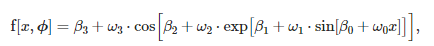

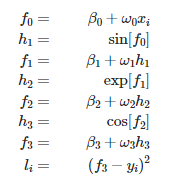

In [6]:
f0 = beta0 + omega0 * x
h1 = np.sin(f0)
f1 = beta1 + omega1 * h1
h2 = np.exp(f1)
f2 = beta2 + omega2 * h2
h3 = np.cos(f2)
f3 = beta3 + omega3 * h3
l_i = (f3 - y)**2

In [7]:
# Let's check we got that right:
print("f0: true value = %3.3f, your value = %3.3f"%(1.230, f0))
print("h1: true value = %3.3f, your value = %3.3f"%(0.942, h1))
print("f1: true value = %3.3f, your value = %3.3f"%(1.623, f1))
print("h2: true value = %3.3f, your value = %3.3f"%(5.068, h2))
print("f2: true value = %3.3f, your value = %3.3f"%(7.137, f2))
print("h3: true value = %3.3f, your value = %3.3f"%(0.657, h3))
print("f3: true value = %3.3f, your value = %3.3f"%(2.372, f3))
print("l_i original = %3.3f, l_i from forward pass = %3.3f"%(l_i_func, l_i))

f0: true value = 1.230, your value = 1.230
h1: true value = 0.942, your value = 0.942
f1: true value = 1.623, your value = 1.623
h2: true value = 5.068, your value = 5.068
f2: true value = 7.137, your value = 7.137
h3: true value = 0.657, your value = 0.657
f3: true value = 2.372, your value = 2.372
l_i original = 0.139, l_i from forward pass = 0.139


### Step 2: Backward pass #1

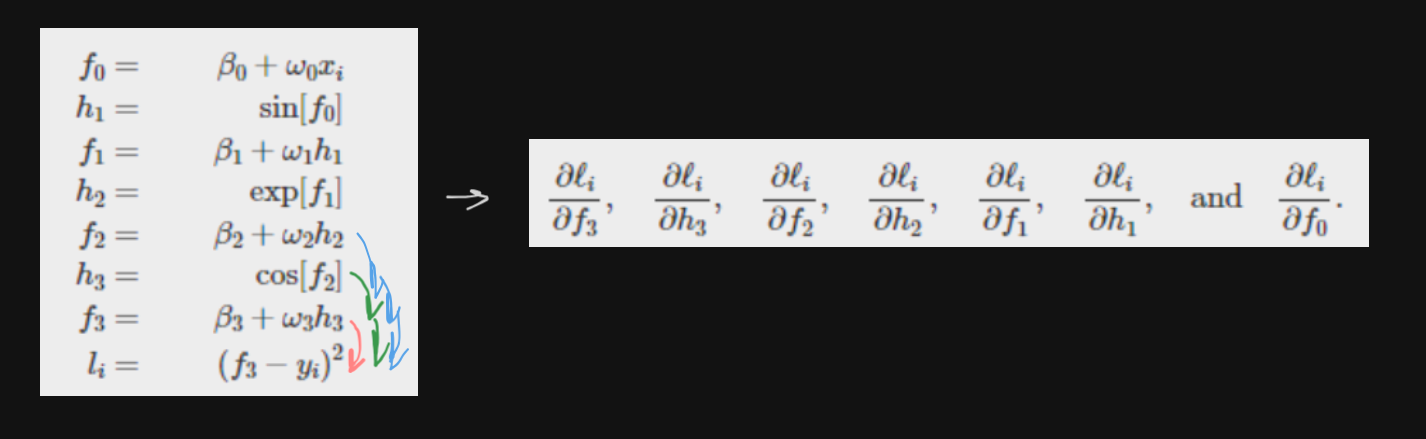

In [17]:
dldf3 = 2 * (f3 - y)
dldh3 = omega3 * (dldf3)
dldf2 = -np.sin(f2) * (dldh3)
dldh2 = omega2 * (dldf2)
dldf1 = np.exp(f1) * (dldh2)
dldh1 = omega1 * (dldf1)
dldf0 = np.cos(f0) * (dldh1)

In [18]:
# Let's check we got that right
print("dldf3: true value = %3.3f, your value = %3.3f"%(0.745, dldf3))
print("dldh3: true value = %3.3f, your value = %3.3f"%(2.234, dldh3))
print("dldf2: true value = %3.3f, your value = %3.3f"%(-1.683, dldf2))
print("dldh2: true value = %3.3f, your value = %3.3f"%(-3.366, dldh2))
print("dldf1: true value = %3.3f, your value = %3.3f"%(-17.060, dldf1))
print("dldh1: true value = %3.3f, your value = %3.3f"%(6.824, dldh1))
print("dldf0: true value = %3.3f, your value = %3.3f"%(2.281, dldf0))

dldf3: true value = 0.745, your value = 0.745
dldh3: true value = 2.234, your value = 2.234
dldf2: true value = -1.683, your value = -1.683
dldh2: true value = -3.366, your value = -3.366
dldf1: true value = -17.060, your value = -17.060
dldh1: true value = 6.824, your value = 6.824
dldf0: true value = 2.281, your value = 2.281


### Step 3: Backward pass #2

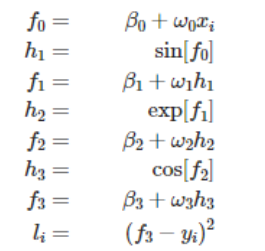

In [19]:
# to finf out how tiny change of parameter affects the loss - we need to compute
# how tiny change of parameter affects its function and how this function affects loss

dldbeta3 = 1 * dldf3
dldomega3 = h3 * dldf3
dldbeta2 = 1 * dldf2
dldomega2 = h2 * dldf2
dldbeta1 = 1 * dldf1
dldomega1 = h1 * dldf1
dldbeta0 = 1 * dldf0
dldomega0 = x * dldf0

In [20]:
# Let's check we got them right
print('dldbeta3: Your value = %3.3f, True value = %3.3f'%(dldbeta3, 0.745))
print('dldomega3: Your value = %3.3f, True value = %3.3f'%(dldomega3, 0.489))
print('dldbeta2: Your value = %3.3f, True value = %3.3f'%(dldbeta2, -1.683))
print('dldomega2: Your value = %3.3f, True value = %3.3f'%(dldomega2, -8.530))
print('dldbeta1: Your value = %3.3f, True value = %3.3f'%(dldbeta1, -17.060))
print('dldomega1: Your value = %3.3f, True value = %3.3f'%(dldomega1, -16.079))
print('dldbeta0: Your value = %3.3f, True value = %3.3f'%(dldbeta0, 2.281))
print('dldomega0: Your value = %3.3f, Function value = %3.3f, Finite difference value = %3.3f'%(dldomega0, dldomega0_func, dldomega0_fd))

dldbeta3: Your value = 0.745, True value = 0.745
dldomega3: Your value = 0.489, True value = 0.489
dldbeta2: Your value = -1.683, True value = -1.683
dldomega2: Your value = -8.530, True value = -8.530
dldbeta1: Your value = -17.060, True value = -17.060
dldomega1: Your value = -16.079, True value = -16.079
dldbeta0: Your value = 2.281, True value = 2.281
dldomega0: Your value = 5.246, Function value = 5.246, Finite difference value = 5.246
